# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

- balcony — число балконов

- ceiling_height — высота потолков (м)

- cityCenters_nearest — расстояние до центра города (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

- first_day_exposition — дата публикации

- floor — этаж

- floors_total — всего этажей в доме

- is_apartment — апартаменты (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- last_price — цена на момент снятия с публикации

- living_area — жилая площадь в квадратных метрах (м²)

- locality_name — название населённого пункта

- open_plan — свободная планировка (булев тип)

- parks_around3000 — число парков в радиусе 3 км

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- rooms — число комнат

- studio — квартира-студия (булев тип)

- total_area — общая площадь квартиры в квадратных метрах (м²)

- total_images — число фотографий квартиры в объявлении

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn
#import pip 
#import missingno as msn
import math
import matplotlib.pyplot as plt #импортировали нужные нам библиотеки

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info() #изучаем общую информацию о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Можно заметить, что в данных есть пропуски и есть названия столбцов, записанных в неправильном стиле.

In [3]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})
data.info() #сразу поменяем на правильный стиль

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заметим, что всего в данных **23699 строк**.

In [4]:
data.head(10) #посмотрим на первые 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрев на первые строки, можно еще заметить, что некоторые типы данных указаны не совсем корректно. Например, тип параметра balcony (количество балконов) - float.

Запомним это и исправим в предобработке данных.

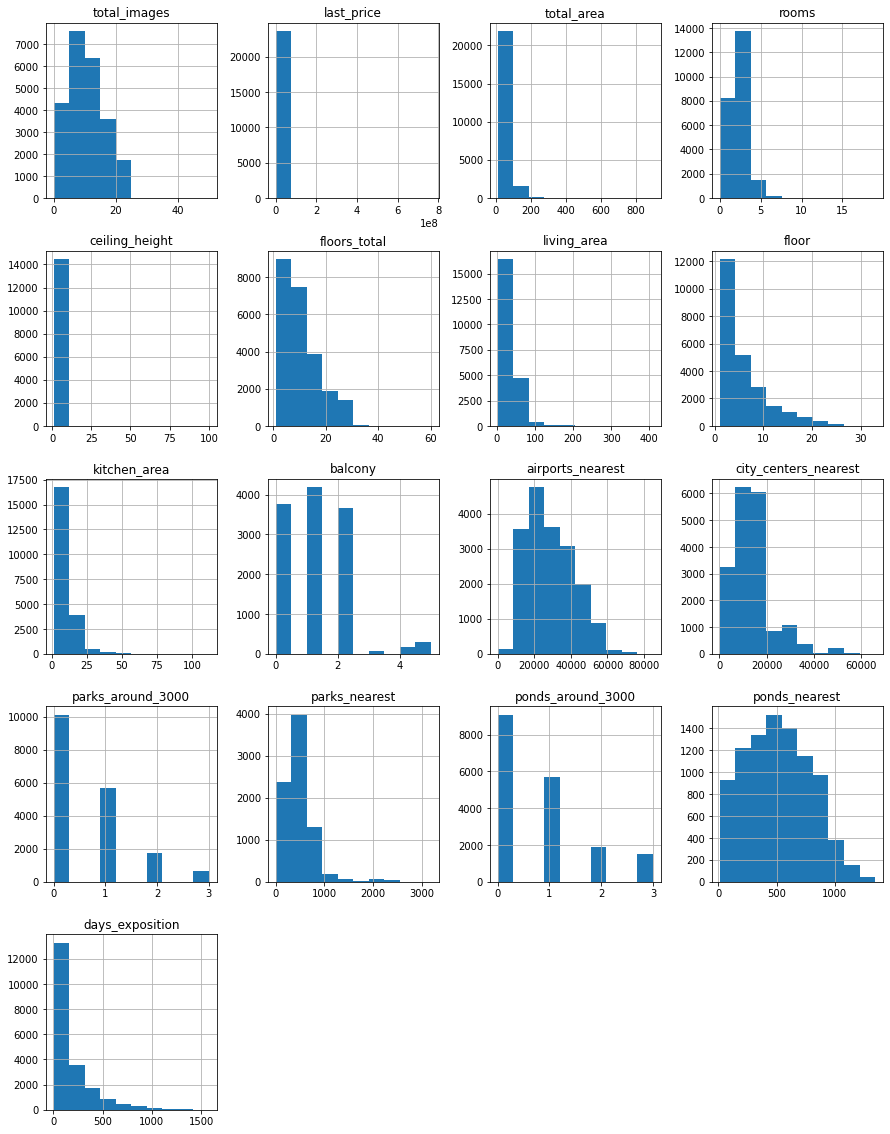

In [5]:
data.hist(figsize=(15,20)) #построили гистрограммы для всех числовых показателей
plt.show()

На некоторых графиках видны выбросы.

## Выполните предобработку данных

### Работа с пропусками

In [6]:
data.isna().sum() #посчитаем количество пропусков по каждому параметру

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

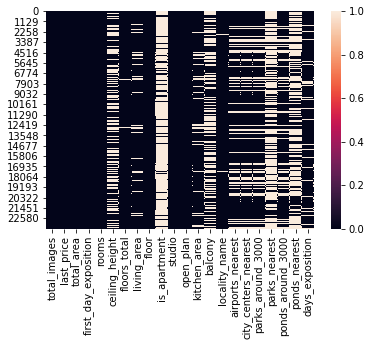

In [7]:
seaborn.heatmap(data.isnull()) #визуализируем пропуски
plt.show()

Можем увидеть, в каких параметрах есть пропущенные значения, некоторые из которых можно заполнить.
***
Параметры, которые нельзя заполнить:
- living_area (жилая площадь в квадратных метрах);
- kitchen_area (площадь кухни в квадратных метрах);
- airports_nearest (расстояние до ближайшего аэропорта в метрах);
- city_centers_nearest (расстояние до центра города в метрах);
- parks_nearest (расстояние до ближайшего парка в метрах);
- ponds_nearest (расстояние до ближайшего водоема в метрах);
- days_exposition (сколько дней было размещено объявление).
***
Однако, есть пропущенные значения, которые можно заполнить:
- ceiling_height (высота потолков в метрах);

Многие квартиры имеют типичную высоту потолков. монжо заполнить пропуски медианным значением всех потолков выборки.
- floors_total (количество этажей в доме);

Возможно продавец указал этаж, на котором продается квартира, но при этом не указал всего количество этажей (хотя это важно знать, так как некоторые люди, например, не хотят жить на последнем этаже). Можно заполнить значения в этом столбце значением из параметра floor.

- is_apartment (апартаменты);

Это булев тип значений, логично пропуски заполнить как False, потому что продавец скорее всего ничего тут не написал, потому что недвижимость не является апартаментами.

- balcony (число балконов);

Аналогично, пропуски могут быть связаны с тем, что балконов в квартире или апартаментах нет, поэтому заменим их на 0.

- locality_name (название населенного пункта);

Название населенного пункта узнать никак нельзя, не связавшись с продавцом, но можно заменить на пустую строку.
- parks_around_3000 (число парков в радиусе 3 км);

Будем считать, что парков нет в радиусе 3 км, так что заполним пропуски нулями.
- ponds_around_3000 (чило водоемов в радиусе 3 км).

Аналогично, как с количеством парков в радиусе 3 км.

***Теперь заполним пропущенные значения там, где это возможно:***

In [9]:
data.loc[data['floors_total'].isna(), 'floors_total'] =  data.loc[data['floors_total'].isna(), 'floor']#заполняем пропуски 
data[['floor', 'floors_total']].head()

,floor,floors_total
0,8,16.0
1,1,11.0
2,4,5.0
3,9,14.0
4,13,14.0


In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заполняем пропуски
data['ceiling_height'].isna().sum() #проверим отсутствие пропусков

0

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заполняем пропуски
data['is_apartment'].isna().sum() #проверим отсутствие пропусков

0

In [12]:
data.loc[data['balcony'].isna(), 'balcony'] = 0 #заполняем пропуски нулями
data['balcony'].isna().sum() #проверим отсутствие пропусков

0

In [13]:
data.loc[data['parks_around_3000'].isna(), 'parks_around_3000'] = 0 #заполняем пропуски нулями
data['parks_around_3000'].isna().sum()

0

In [14]:
data.loc[data['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0 #заполняем пропуски нулями
data['ponds_around_3000'].isna().sum()

0

In [15]:
data.loc[data['locality_name'].isna(), 'locality_name'] = '' #заполняем пропуски 
data['locality_name'].isna().sum() #проверим отсутствие пропусков

0

In [16]:
data.info() #убедимся еще раз в том, что нужные значения заполнены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Теперь посмотрим на типы данных, которые кажутся неподходящими:

- first_day_exposition (дата публикации);

Так как это дата, то хочется привести ее к типу datetime.
- balcony (количество балконов);

Нужно поменять тип c чисел с плавающей точкой на целочисленные значения, потому что количество балконов не может быть вещественным.
- days_exposition (сколько дней было размещено объявление);

Аналогичная ситуация, как с количеством балконов.

- parks_around_3000 (число парков в радиусе 3 км);

Тоже следует поменять тип значений на целочисленные.
- ponds_around_3000 (число водоемов в радиусе 3 км).

Также меняем тип на целочисленный.

***Исправим неподходящие типы данных***

In [17]:
data['balcony'] = data['balcony'].astype('int32') #заменить тип на int
data['parks_around_3000'] = data['parks_around_3000'].astype('int32')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int32')
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000         int32
parks_nearest           float64
ponds_around_3000         int32
ponds_nearest           float64
days_exposition         float64
dtype: object

С количеством дней, во время которых висело объявление, не все так просто, как с количеством балконов, так как присутствуют пропуски, которые не подлежали замене.
Заменим тип данных, не трогая пропуски в этих столбцах.

In [18]:
data['days_exposition'] = pd.array(data['days_exposition'], dtype = 'int')

И осталось поменять тип у first_day_exposition.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
data.dtypes #проверяем все внесенные изменения

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                  int64
dtype: object

Все типы данных поменяны, можно продолжать работу!)

### Работа с дубликатами

In [21]:
data['locality_name'].unique() # посмотрим на массив уникальных названий населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:
len(data['locality_name'].unique()) #узнаем количество уникальных значений до обработки

365

Можно заметить, что в данных очень часто слово, например, поселок пишется по-разному. Нужно заменить все ё на е, чтобы избежать неявных дубликатов.
Также заметно сходство в понятиях "городской поселок" и "поселок городского типа". Следует оставить одно из них.

In [23]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'e').replace(['коттеджный','городской', 'городского типа'], 'поселок городского типа', regex=True) 

In [24]:
data['locality_name'].unique() #проверим, что все заменили

array(['Санкт-Петербург', 'посeлок Шушары',
       'поселок городского типа посeлок Янино-1', 'посeлок Парголово',
       'посeлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок поселок городского типа Красный Бор', 'Гатчина',
       'поселок Мурино', 'деревня Фeдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посeлок Металлострой',
       'посeлок поселок городского типа Лебяжье',
       'посeлок поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посeлок Аннино',
       'поселок поселок городского типа Ефимовский', 'посeлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посeлок Понтонный',

In [113]:
len(data['locality_name'].unique()) #посмотрим, как изменилось количество уникальных населенных пунктов

306

In [114]:
len(data) #посмотрим, как изменилось количество данных

17287

Избавились от неявных дубликатов, заменив букву 'ё' на 'е' и исправив типы поселков.

Данных стало меньше по количеству, но зато в них нет неяных дубликатов.

## Добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [26]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2) #находим цену одного квадратного метра, округлив до 2 знаков после запятой
data.head(10) #проверим, что все сработало

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-9223372036854775808,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2,посeлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,поселок городского типа посeлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1,посeлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,-9223372036854775808,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,посeлок Мурино,NaN,NaN,0,NaN,0,NaN,189,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59


### День публикации объявления

In [27]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-9223372036854775808,120370.37,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,посeлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,поселок городского типа посeлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79,0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,посeлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,-9223372036854775808,110544.69,3
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,посeлок Мурино,NaN,NaN,0,NaN,0,NaN,189,87454.76,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6


### Месяц публикации объявления

In [28]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,-9223372036854775808,120370.37,3,3
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,0,NaN,0,NaN,55,95065.79,0,9
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3,11
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,23982.0,11634.0,0,NaN,0,NaN,-9223372036854775808,110544.69,3,4
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,0,NaN,0,NaN,189,87454.76,2,5
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6,2


### Год публикации объявления

In [29]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1,482.0,2,755.0,-9223372036854775808,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,0,NaN,0,NaN,55,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,19143.0,0,NaN,0,NaN,155,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,11634.0,0,NaN,0,NaN,-9223372036854775808,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,0,NaN,0,NaN,189,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0,NaN,0,NaN,289,88524.59,6,2,2017


### Тип этажа квартиры

In [30]:
def floor_type(string): #напишем функцию, которую будет определять категорию этажа
    if string['floor'] == 1:
        return 'первый'
    elif string['floor'] == string['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [31]:
data['type_of_floor'] = data.apply(floor_type, axis=1)
data['type_of_floor'].unique() #проверим

array(['другой', 'первый', 'последний'], dtype=object)

### Расстояние до центра города (км)

In [32]:
data['distance_to_centre'] = (data['city_centers_nearest'] / 1000).round()
data[['city_centers_nearest','distance_to_centre']] #проверим, что корректно округляется

,city_centers_nearest,distance_to_centre
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0
...,...,...
23694,4232.0,4.0
23695,NaN,NaN
23696,NaN,NaN
23697,10364.0,10.0


## Проведите исследовательский анализ данных

### Работа с аномальными значениями и изучение параметров датасета

#### Общая площадь

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17287 entries, 1 to 23695
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            17287 non-null  int64         
 1   last_price              17287 non-null  float64       
 2   total_area              17287 non-null  float64       
 3   first_day_exposition    17287 non-null  datetime64[ns]
 4   rooms                   17287 non-null  int64         
 5   ceiling_height          17287 non-null  float64       
 6   floors_total            17287 non-null  float64       
 7   living_area             17287 non-null  float64       
 8   floor                   17287 non-null  int64         
 9   is_apartment            17287 non-null  bool          
 10  studio                  17287 non-null  bool          
 11  open_plan               17287 non-null  bool          
 12  kitchen_area            17287 non-null  float6

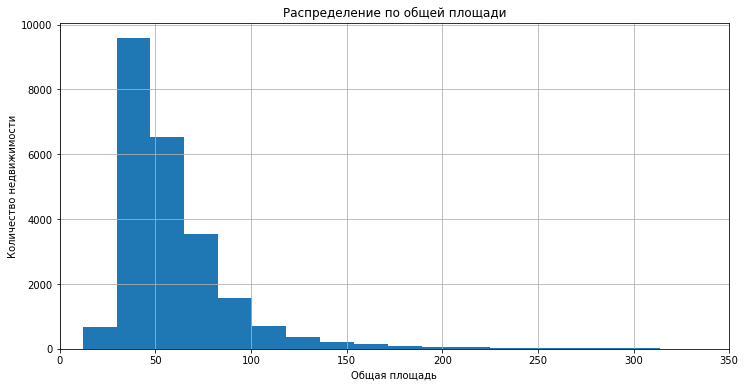

In [33]:
data['total_area'].hist(bins=50, figsize=(12,6))
plt.title('Распределение по общей площади')
plt.xlim(0,350) #значения не более 350
plt.xlabel('Общая площадь')
plt.ylabel('Количество недвижимости')
plt.show() #построили гистограмму распределения по общей площади

По гистограмме можно заметить, что мало квартир, площадь которых превышает 175(м^2).
Посмотрим, какую долю они составляют в общей выборке.

In [34]:
data_total_area = data.query('total_area <= 175') #делаем срез данных
share = (len(data) - len(data_total_area)) / len(data)
print("Доля квартир по площади больших 175(м^2):", share*100)

Доля квартир по площади больших 175(м^2): 1.4346596902822906


То есть, квартиры, которые превышают 175(м^2) составляют порядка 1,5% от всей выборки.

Такие аномальные значения можно удалить из данных и построить новую диаграмму.

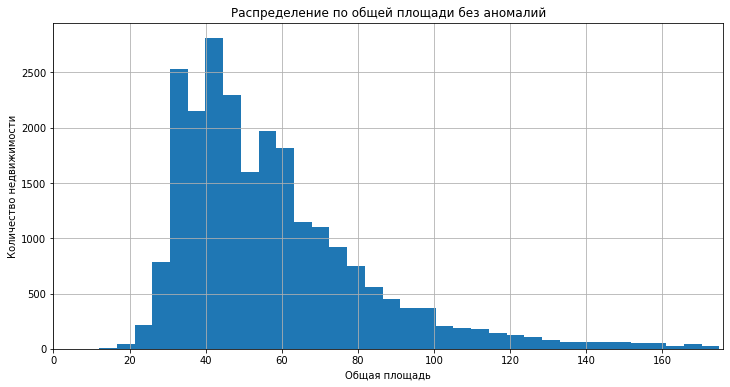

In [35]:
data = data_total_area
data['total_area'].hist(bins=35, figsize=(12,6))
plt.title('Распределение по общей площади без аномалий')
plt.xlim(0,176) #значения не более 175
plt.xlabel('Общая площадь')
plt.ylabel('Количество недвижимости')
plt.show() #построили гистограмму распределения по общей площади

In [36]:
data['total_area'].describe()

count    23359.000000
mean        57.559187
std         25.042108
min         12.000000
25%         40.000000
50%         51.500000
75%         68.200000
max        175.000000
Name: total_area, dtype: float64

Таким образом, можно сделать следующие выводы:
- Средняя площадь квартир порядка 57,5 квадратных метра;
- В основном, предалагаются квартиры от 40 до 68 квадратных метра.

#### Жилая площадь

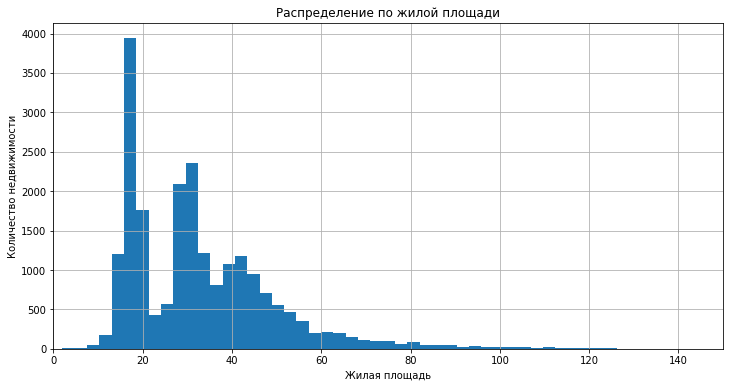

In [37]:
data['living_area'].hist(bins=50, figsize=(12,6)) #строим гистограмму
plt.title('Распределение по жилой площади')
plt.xlim(0,150) #просмотрели, что значения не более 150
plt.xlabel('Жилая площадь')
plt.ylabel('Количество недвижимости')
plt.show() 

In [115]:
data_living_area = data.query('living_area < 100') #делаем срез данных
share = (len(data) - len(data_living_area)) / len(data)
print("Доля квартир по жилой площади больших 100(м^2):", share*100)

Доля квартир по жилой площади больших 100(м^2): 0.13883264881124543


In [103]:
#len(data_living_area)

17263

In [116]:
#len(data)

17287

Квартиры с жилой площадью более 100 квадратных метров занимают порядка 0.14% от всех выборки и являются аномальными. 

Удалим их из выборки и построим новую гистограмму.

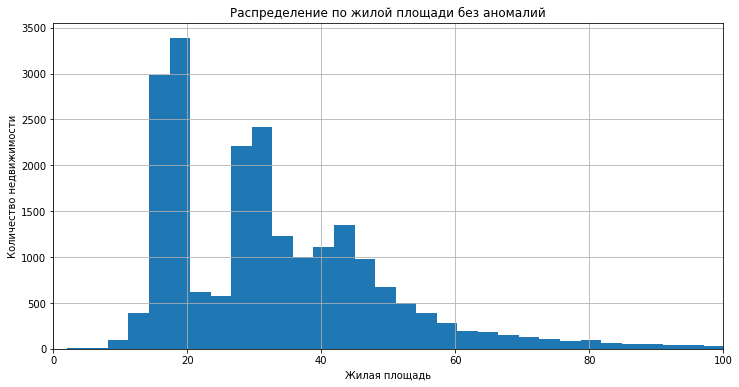

In [39]:
data = data_living_area
data['living_area'].hist(bins=35, figsize=(12,6))
plt.title('Распределение по жилой площади без аномалий')
plt.xlim(0,100) #значения не более 100
plt.xlabel('Жилая площадь')
plt.ylabel('Количество недвижимости')
plt.show() 

In [126]:
data['living_area'].describe() #опишем обновленные данные

count    17257.000000
mean        31.331172
std         14.477870
min          2.000000
25%         18.110000
50%         29.600000
75%         40.000000
max        108.000000
Name: living_area, dtype: float64

Из обновленного датафрейма можно сделать выводы:
- Довольно мало квартир, которые по жилой площади занимают менее 10 и более 80 квадртаных метров;
- Средняя площадь жилого помещения около чуть больше 30 квадратных метров;
- В основном, квартиры имеют жилую площадь от 18,5 до 42 квадратных метра.

#### Площадь кухни

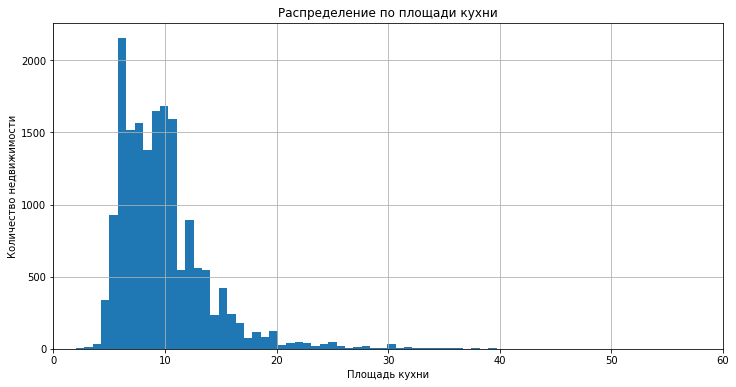

In [121]:
data['kitchen_area'].hist(bins=50, figsize=(12,6)) #строим гистограмму
plt.title('Распределение по площади кухни')
plt.xlim(0,60) #просмотрели, что значения не более 60
plt.xlabel('Площадь кухни')
plt.ylabel('Количество недвижимости')
plt.show() 

In [122]:
data_kitchen_area = data.query('kitchen_area < 35') #делаем срез данных
share = (len(data) - len(data_kitchen_area)) / len(data)
print("Доля квартир по площади кухни больших 35(м^2):", share*100)

Доля квартир по площади кухни больших 35(м^2): 0.1735408110140568


Кухни, которые по площади занимают не менее 35 квадратных метра, аномальны, и они составляют 0.17% от всей выборки.


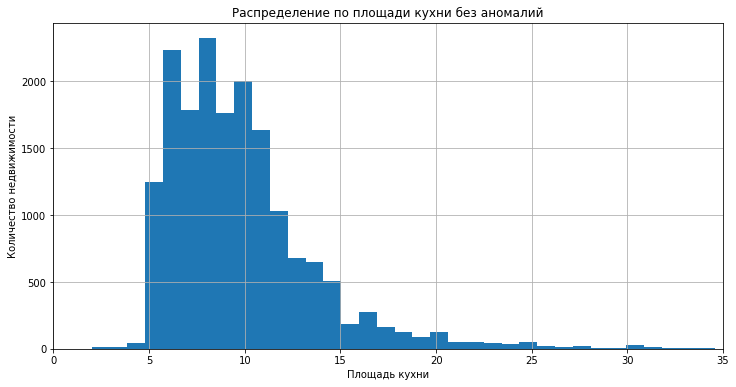

In [124]:
data = data_kitchen_area
data['kitchen_area'].hist(bins=35, figsize=(12,6))
plt.title('Распределение по площади кухни без аномалий')
plt.xlim(0,35) #значения не более 35
plt.xlabel('Площадь кухни')
plt.ylabel('Количество недвижимости')
plt.show() 

In [125]:
data['kitchen_area'].describe()

count    17257.000000
mean         9.782397
std          3.884281
min          2.000000
25%          7.000000
50%          9.000000
75%         11.200000
max         34.600000
Name: kitchen_area, dtype: float64

После того, как мы удалили аномальные значения, можем сделать выводы:
- Средняя площадь кухни: 10 квадратных метра;
- В основном, квартиры в выборке имеют кухни площадью от 7 до 11 квадратных метра;
- Кухни, площадь которых больше 30 квадратных метра встречаются редко.

#### Цена объекта

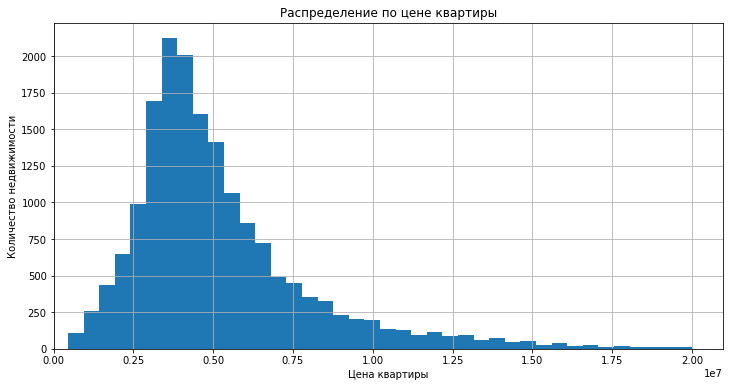

In [127]:
data['last_price'].hist(bins=40, figsize=(12,6)) #строим гистограмму
plt.title('Распределение по цене квартиры')
plt.xlim(0)
plt.xlabel('Цена квартиры')
plt.ylabel('Количество недвижимости')
plt.show() 

По оси цена квартиры показаны числа, умноженные на 10^8.

Монжо увидеть, что после 1.75 миллионов идут аномально низкие значения. Посмотрим, сколько они занимают места в выборке.

In [130]:
data_price = data.query('last_price < 17500000') #делаем срез данных
share = (len(data) - len(data_price)) / len(data)
print("Доля квартир по цене превышающих 1.75 миллионов:", share*100)

Доля квартир по цене превышающих 1.75 миллионов: 0.4461957466535319


От выборки они занимают чуть более 0.44%. Для того, чтобы датафрейм был без аномальных значений, мы их удаляем.

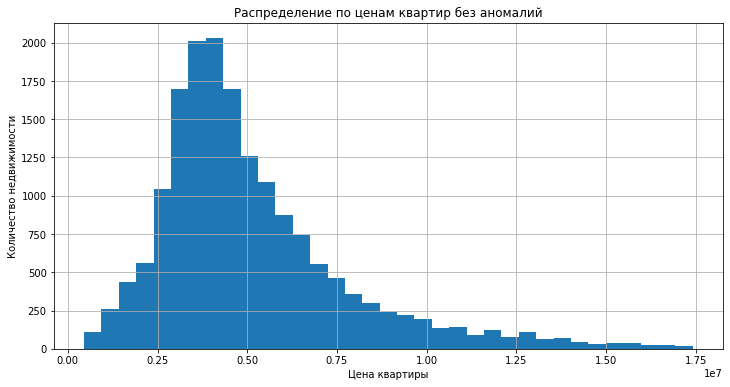

In [131]:
data = data_price
data['last_price'].hist(bins=35, figsize=(12,6))
plt.title('Распределение по ценам квартир без аномалий')
plt.xlabel('Цена квартиры')
plt.ylabel('Количество недвижимости')
plt.show() 

In [132]:
data['last_price'].describe()

count    1.718000e+04
mean     5.126415e+06
std      2.685388e+06
min      4.500000e+05
25%      3.400000e+06
50%      4.490000e+06
75%      6.148500e+06
max      1.741472e+07
Name: last_price, dtype: float64

Выводы, которые можно сделать:
- Цены квартир варьируются от порядка четырехсот тысяч до 20 миллионов;
- В основном, квартиры стоят от 3 миллионов до 6 миллионов.

#### Количество комнат

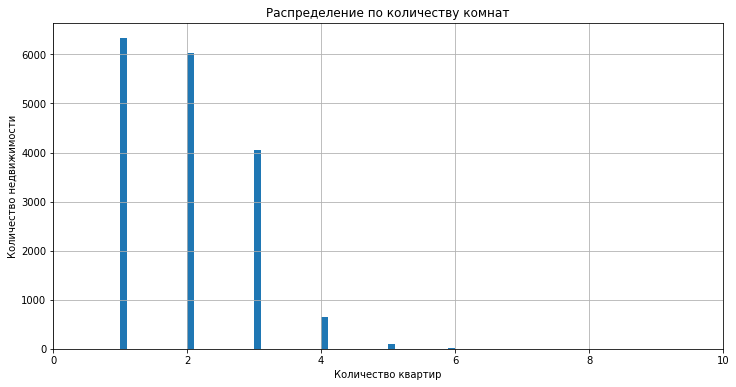

In [133]:
data['rooms'].hist(bins=50, figsize=(12,6))
plt.title('Распределение по количеству комнат')
plt.xlim(0,10) #значения не более 10
plt.xlabel('Количество квартир')
plt.ylabel('Количество недвижимости')
plt.show()

In [134]:
data['rooms'].describe()

count    17180.000000
mean         1.963912
std          0.905823
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Количество комнат в квартире, равное 6, аномально. Узнаем, много ли таких в Санкт-Петербурге и ближних населенных пунктах.

In [135]:
data_rooms = data.query('rooms != 6') #делаем срез данных
share = (len(data) - len(data_rooms)) / len(data)
print("Доля квартир, в которых 6 комнат:", share*100)

Доля квартир, в которых 6 комнат: 0.07566938300349244


Такие квартиры занимают менее одной десятой процента от всех.

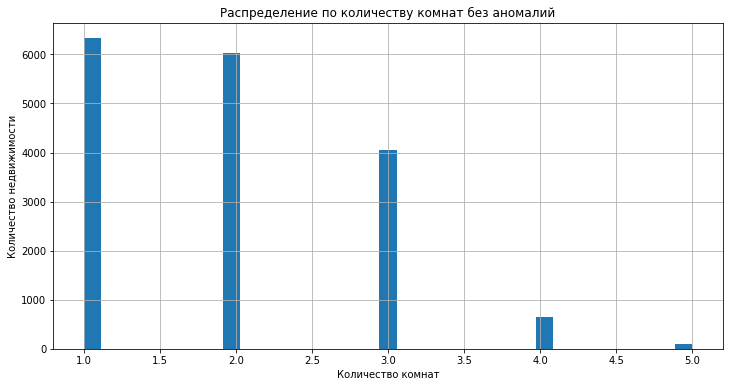

In [136]:
data = data_rooms
data['rooms'].hist(bins=35, figsize=(12,6))
plt.title('Распределение по количеству комнат без аномалий')
plt.xlabel('Количество комнат')
plt.ylabel('Количество недвижимости')
plt.show()

In [137]:
data['rooms'].describe() #посмотрим на обновленный датафрейм

count    17167.000000
mean         1.960855
std          0.899328
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Из такого распредления можно сделать следующие выводы:
- В основном, продаются квартиры с 1, 2 или 3 комнатами.
- Большинство квартир 2-х комнатные.
- Квартиры с 4 и 5 комнатами встречаются реже, чем остальные.

#### Высота потолков

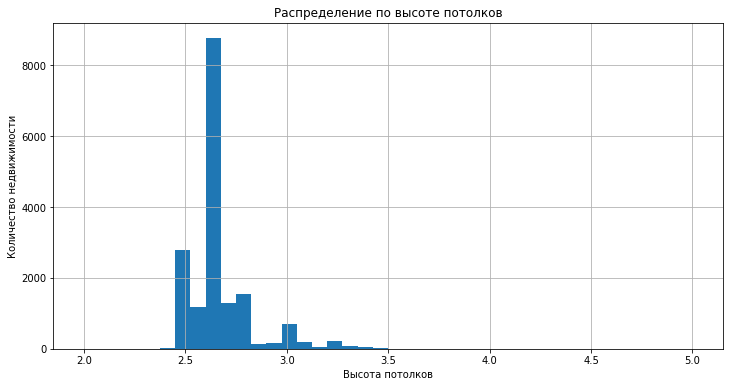

In [138]:
data['ceiling_height'].hist(bins=40, figsize=(12,6), range=(2,5))
plt.title('Распределение по высоте потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество недвижимости')
plt.show()

In [140]:
data_ceiling_height = data.query('ceiling_height < 3.4') #делаем срез данных
share = (len(data) - len(data_ceiling_height)) / len(data)
print("Доля квартир, в которых высота потолков более 3.4 м:", share*100)

Доля квартир, в которых высота потолков более 3.4 м: 0.28543135084755633


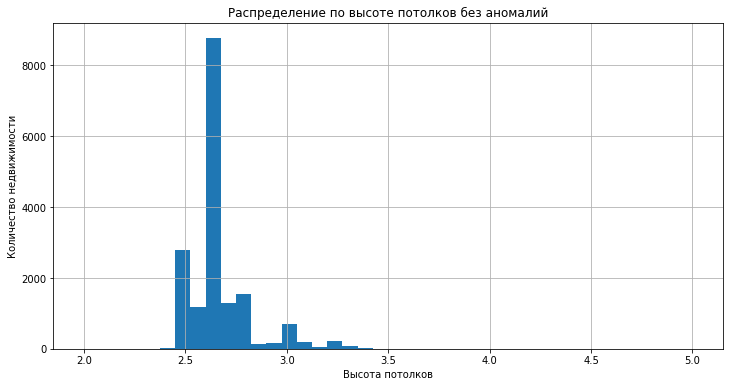

In [141]:
data = data_ceiling_height
data['ceiling_height'].hist(bins=40, figsize=(12,6), range=(2,5))
plt.title('Распределение по высоте потолков без аномалий')
plt.xlabel('Высота потолков')
plt.ylabel('Количество недвижимости')
plt.show()

In [142]:
data['ceiling_height'].describe()

count    17118.000000
mean         2.664589
std          0.147089
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.390000
Name: ceiling_height, dtype: float64

Очистив данные от аномальных значений высоты потолков, можем сделать выводы:
- В основном, в СПб и пригородах высота потолков от 2.6 метров до 2,7 метров;
- Высота потолков около 3.4-3.5 метров встречается крайне редко.

#### Тип этажа квартиры

Лучше всего распрделение по типам этажей квартиры покажет круговая диаграмма. Построим ее.

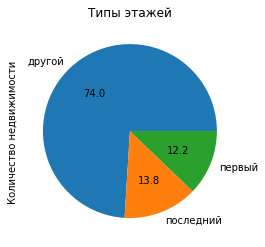

In [146]:
data['type_of_floor'].value_counts().plot(kind='pie', title='Типы этажей', ylabel='Количество недвижимости', autopct='%.1f')
plt.show()

Здесмь все хорошо, без аномалий.

Можно сделать вывод о том, что в основном продаются квартиры не на первом и не на последнем этажах.

Последний этаж встречается чуть чаще, чем первый этаж.

#### Общее количество этажей в доме

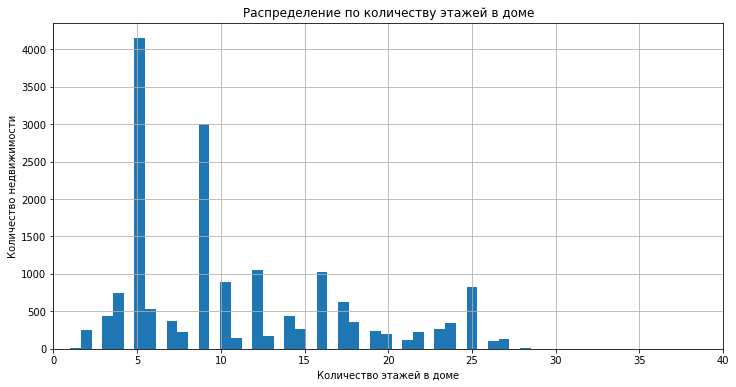

In [147]:
data['floors_total'].hist(bins=50, figsize=(12,6))
plt.title('Распределение по количеству этажей в доме')
plt.xlim(0,40) #значения не более 40
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество недвижимости')
plt.show()

Максимальное количество этажей в СПб - 37 (два из которых подземные) у «Князя Александр Невский», построенный холдингом «РосСтройИнвест» (на сегодняшний день является самым высоким жилым домом в СПб). То есть количество этажей достигает 35 этажей, так как подземные этажи считать не будем - это для паркинга предусмотрено, а не для квартир.
Видим, что такое значение аномальное, значит его удалим.

In [148]:
data_floors = data.query('floors_total < 35') #делаем срез данных
share = (len(data) - len(data_floors)) / len(data)
print("Доля квартир, в которых всего этажей не менее 35:", share*100)

Доля квартир, в которых всего этажей не менее 35: 0.0


Очевидно, что таких домов очень мало в выборке (менее 1%).

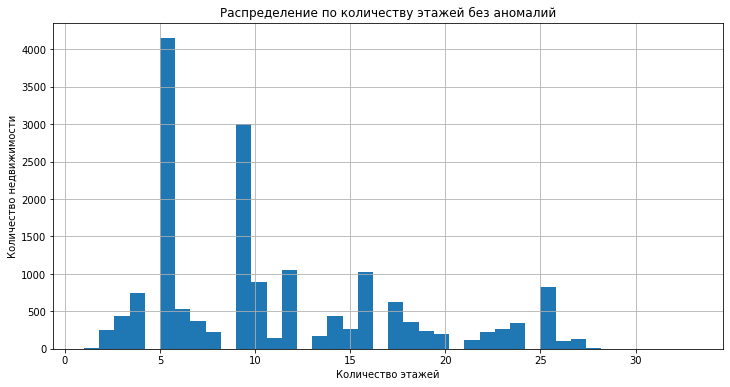

In [149]:
data = data_floors
data['floors_total'].hist(bins=40, figsize=(12,6))
plt.title('Распределение по количеству этажей без аномалий')
plt.xlabel('Количество этажей')
plt.ylabel('Количество недвижимости')
plt.show()

Видно, что происходит деление между этажами. Скорее всего, высота этажей сильно зависит от того, в каком районе находится дом.

In [62]:
data['floors_total'].describe()

count    19893.000000
mean        10.683456
std          6.492342
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         33.000000
Name: floors_total, dtype: float64

Выводы:
- В основном, дома имеют от 5 до 16 этажей;
- Дома, в которых 9 этажей, преобладают в выборке.

#### Расстояние до центра города в метрах

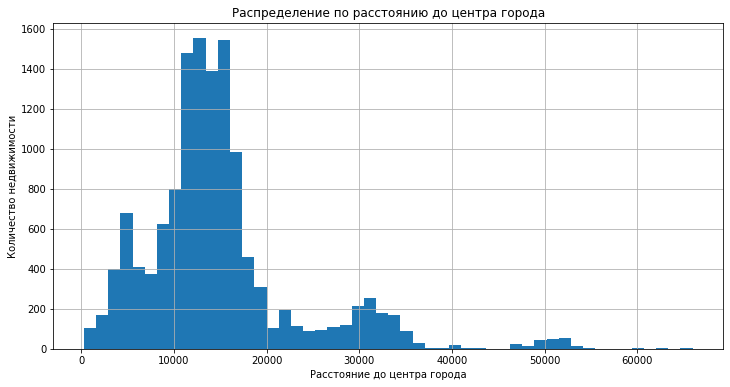

In [150]:
data['city_centers_nearest'].hist(bins=50, figsize=(12,6))
plt.title('Распределение по расстоянию до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество недвижимости')
plt.show()

In [151]:
data['city_centers_nearest'].describe()

count    13271.000000
mean     14840.922990
std       8484.795215
min        287.000000
25%      10479.500000
50%      13490.000000
75%      16556.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

В основном, от домов до центра города от 10 км до 16,5 км.
Присутвуют также квартиры, которые находятся в центре практически, и те квартиры, которые находятся загородом (пригородах СПб, которые мы тоже рассматриваем).

#### Расстояние до ближайшего парка в метрах

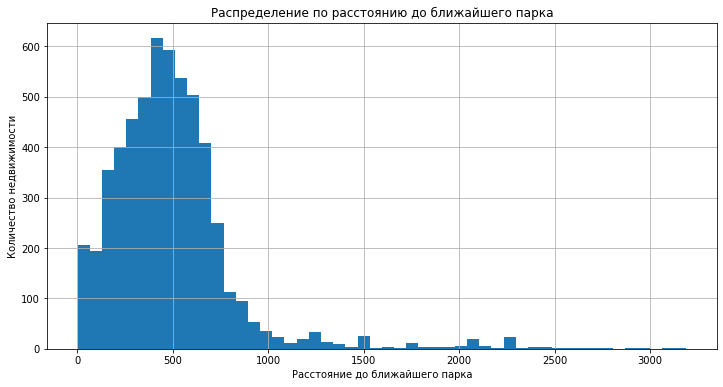

In [152]:
data['parks_nearest'].hist(bins=50, figsize=(12,6))
plt.title('Распределение по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество недвижимости')
plt.show()

In [153]:
data['parks_nearest'].describe()

count    5558.000000
mean      491.666607
std       336.743893
min         1.000000
25%       289.250000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В основном, до парка от жилого дома идти от 300 до 600 метров, что говорит о том, что дома скорее всего расположены в спальных районах, дальше от центра города.

### Быстрота продаж квартир

In [154]:
data['days_exposition'].describe()

count    17118.000000
mean       180.659598
std        216.768039
min          1.000000
25%         44.000000
50%         99.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [156]:
data = data.query('days_exposition > 0') #сделаем срез
data['days_exposition'].describe() 

count    17118.000000
mean       180.659598
std        216.768039
min          1.000000
25%         44.000000
50%         99.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [158]:
data['days_exposition'].median() #посмотрим на медианное значение

99.0

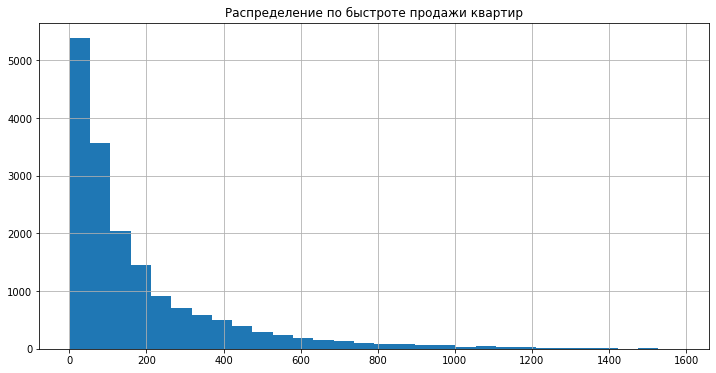

In [161]:
data['days_exposition'].hist(bins=30, figsize=(12,6))
plt.title("Распределение по быстроте продажи квартир")
plt.show()

На графике видны пики в пределах 100 дней.

Попробуем посмотреть на них поближе.

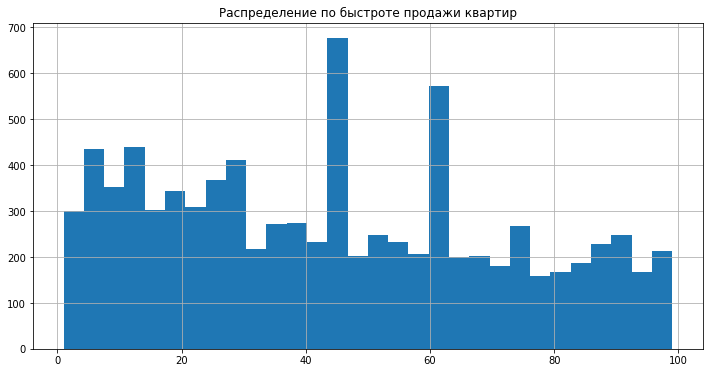

In [165]:
data_sell = data.query('days_exposition < 100')
data_sell['days_exposition'].hist(bins=30, figsize=(12,6))
plt.title("Распределение по быстроте продажи квартир")
plt.show()

Видно, что есть сильные пики в период 45 и 62 дней.

Возможно, в этот остаются только объявления с высокими ценами на квартиры.

In [166]:
data['days_exposition'].describe()

count    17118.000000
mean       180.659598
std        216.768039
min          1.000000
25%         44.000000
50%         99.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Чаще всего квартиры подаются за 99 дней;
- Можно попробовать продать квартиру быстро, за 44 дня.
***
- Интересно, что есть и квартиры, которые ожидают покупки более 4 лет, что необычно долго.

### Факторы, которые больше всего влияют на общую стоимость объекта

#### Влияние общей площади квартиры на стоимость квартиры

In [72]:
data_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_total_area.head()

,total_area,last_price
0,14.0,1190000.0
1,17.0,1900000.0
2,18.0,770000.0
3,18.4,2200000.0
4,20.0,2950000.0


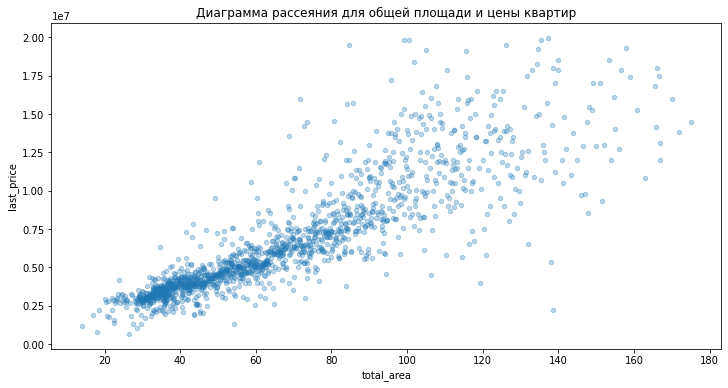

In [73]:
data_total_area = data_total_area.sort_values(by='total_area', ascending=True)
data_total_area.plot(title='Диаграмма рассеяния для общей площади и цены квартир', x='total_area', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

По диаграмме рассеяния четко видна линейная зависимость между рассматриваемыми параметрами, особенно для квартир площадью менее 100 квадратных метров. Подтвердим эту зависимость, вычислив коэффициент корреляции Пирсона.

In [74]:
data_total_area.corr()

,total_area,last_price
total_area,1.000000,0.867964
last_price,0.867964,1.000000


Корреляция равна 0.86, что доказывает сильную положительную линейную зависимость.

Таким образом, мы выяснили, что общая площадь квартиры прямопропорционально влияет на ее цену.

#### Влияние жилой площади на стоимость квартиры

In [75]:
data_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_living_area.head()

,living_area,last_price
0,2.0,6350000.0
1,3.0,4440000.0
2,5.4,6100000.0
3,6.0,3799000.0
4,6.5,4050000.0


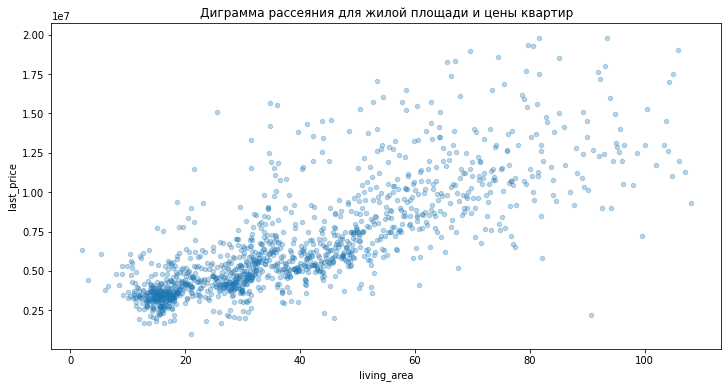

In [76]:
data_living_area = data_living_area.sort_values(by='living_area', ascending=True)
data_living_area.plot(title='Диграмма рассеяния для жилой площади и цены квартир', x='living_area', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

По диаграмме можно предположить, что линейная зависимость есть, но не такая сильная, как для общей площади квартиры. Проверим догадку с помощью коэффициента корреляции.

In [77]:
data_living_area.corr()

,living_area,last_price
living_area,1.000000,0.791512
last_price,0.791512,1.000000


По коэффициенту корреляции Пирсона можем судить, что есть прямопропорциональная зависимость между данными двумя факторами.

#### Влияние площади кухни на стоимость квартиры

In [78]:
data_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_kitchen_area.head()

,kitchen_area,last_price
0,2.00,2720000.0
1,2.30,2940000.0
2,2.40,2200000.0
3,2.89,5967734.0
4,3.00,3180000.0


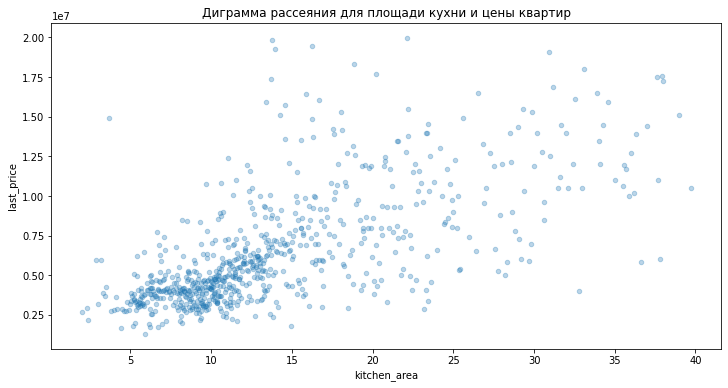

In [79]:
data_kitchen_area = data_kitchen_area.sort_values(by='kitchen_area', ascending=True)
data_kitchen_area.plot(title='Диграмма рассеяния для площади кухни и цены квартир', x='kitchen_area', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

In [80]:
data_kitchen_area.corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.667925
last_price,0.667925,1.000000


Зависимость между площадью кухни и цены квартир присутствует. Она прямопропорциональная, но слабее, чем с общей площадью и жилой площадью квартиры.

#### Влияние количества комнат на стоимость квартиры

In [81]:
data_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_rooms.head()

,rooms,last_price
0,1,3600000.0
1,2,4650000.0
2,3,5900000.0
3,4,7500000.0
4,5,10450000.0


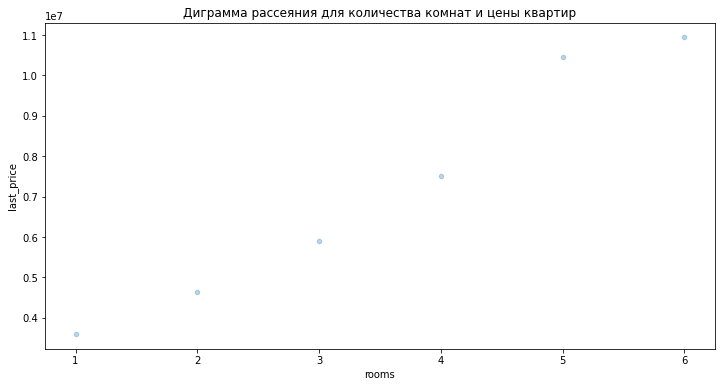

In [82]:
data_rooms = data_rooms.sort_values(by='rooms', ascending=True)
data_rooms.plot(title='Диграмма рассеяния для количества комнат и цены квартир', x='rooms', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

In [83]:
data_rooms.corr()

,rooms,last_price
rooms,1.00000,0.98385
last_price,0.98385,1.00000


Увидели и доказали, что корреляция между количеством комнат в квартире и ее цены прямопропорциональная и сильнее всех вышепосчитанных.

#### Влияние типа этажа на стоимость квартиры

In [84]:
data_type_of_floor = data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_type_of_floor.head()

,type_of_floor,last_price
0,другой,4650000.0
1,первый,3850000.0
2,последний,4190000.0


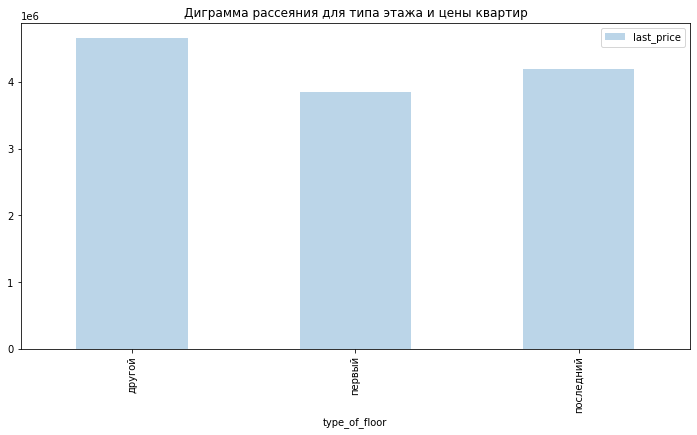

In [167]:
data_type_of_floor.plot(title='Диграмма рассеяния для типа этажа и цены квартир', x='type_of_floor', y='last_price', kind='bar', figsize=(12,6), alpha=0.3)
plt.show()

Из диграммы можно сделать следующие выводы:
- Квартиры на первом этаже стоят дешевле, чем на всех других;
- Дороже всего стоят квартиры не на первом и не на последнем этажах.

Таким образом, зависимость между типом этажа квартиры и ее ценой безусловна есть.

#### Влияние даты размещения на стоимость квартиры

##### Влияние дня недели размещения на стоимость квартиры

In [86]:
data_day = data.pivot_table(index='weekday', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_day

,weekday,last_price
0,0,4450000.0
1,1,4530000.0
2,2,4500000.0
3,3,4500000.0
4,4,4400000.0
5,5,4450000.0
6,6,4450000.0


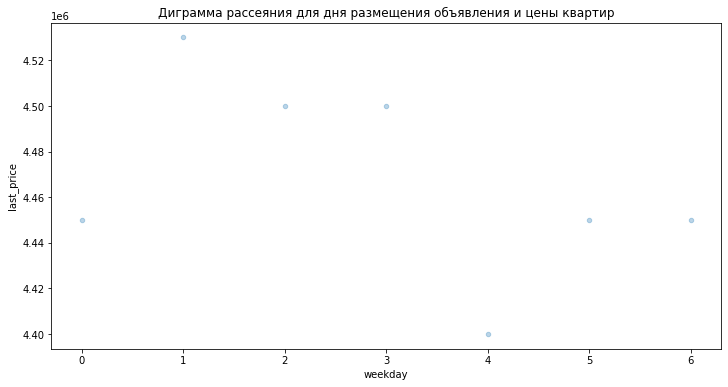

In [169]:
data_day.plot(title='Диграмма рассеяния для дня размещения объявления и цены квартир', x='weekday', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

В данном случае зависимость между днем недели и ценой не проявляется и не похожа на линейную, потому коэффициент корреляции ничего не даст.

Интересный факт из диаграммы:
- Самая высокая цена была по вторникам, а самая низкая - по пятницам.

##### Влияние месяца размещения на стоимость квартиры

In [88]:
data_month = data.pivot_table(index='month', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_month

,month,last_price
0,1,4500000.0
1,2,4495000.0
2,3,4433484.0
3,4,4500000.0
4,5,4450000.0
5,6,4300000.0
6,7,4400000.0
7,8,4500000.0
8,9,4599000.0
9,10,4450000.0


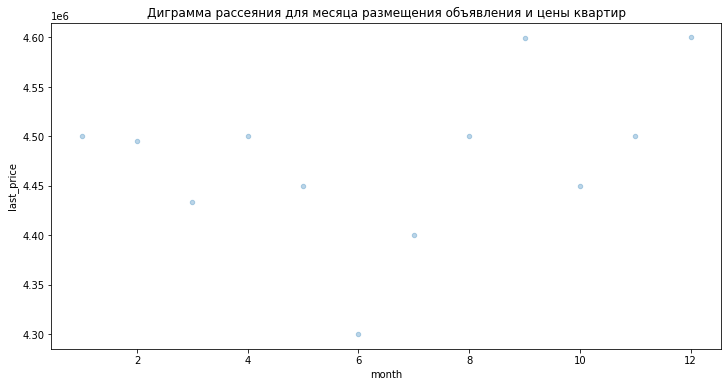

In [89]:
data_month.plot(title='Диграмма рассеяния для месяца размещения объявления и цены квартир', x='month', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

На графике можно увидеть совсем слабую линейную зависимость, попробуем посчитать корреляцию.

Зависимости между месяцем размещения объявления и ценой квартиры как таковой нет.
Однако, можно сделать следующие выводы:
- Самые высокие цены на квартиры, которые были выставлены на сайт в сентябре и в декабре;
- Самые низкие цены на квартиры, которые были выставлены на сайт в июне.

##### Влияние года размещения на стоимость квартиры

In [91]:
data_year = data.pivot_table(index='year', values='last_price', aggfunc='median').reset_index() #посмотрим сводную таблицу по интересующим нас параметрам
data_year.head()

,year,last_price
0,2014,6051250.0
1,2015,4990000.0
2,2016,4400000.0
3,2017,4400000.0
4,2018,4500000.0


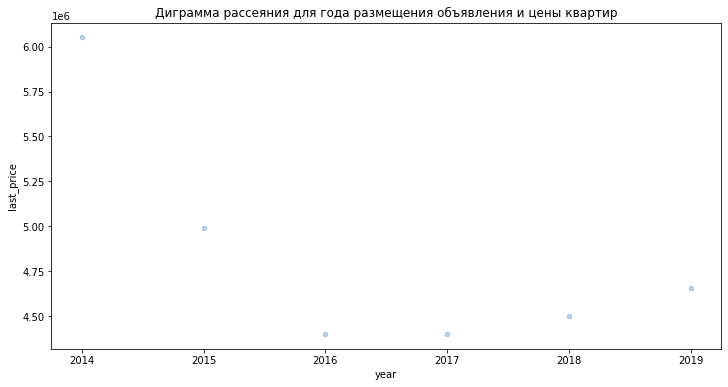

In [92]:
data_year.plot(title='Диграмма рассеяния для года размещения объявления и цены квартир', x='year', y='last_price', kind='scatter', figsize=(12,6), alpha=0.3)
plt.show()

По графику зависимость больше похожа на гиперболическую, чем на линейную, поэтому коэффициент Пирсона ничего не даст в этом случае.

Однако, сделаем выводы:
- Квартиры, в основном, стоили дороже всего в 2014 году;
- Дешевле всего квартиры стоили в 2016 году;
- С 2017 года постепенно виден рост цен на квартиры.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [93]:
data_locality_name = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean']).reset_index()
data_locality_name.columns=['city', 'count', 'mean']
data_locality_name.head()

,city,count,mean
0,,35,92462.194571
1,Бокситогорск,8,16041.606250
2,Волосово,30,40198.900333
3,Волхов,68,34749.245588
4,Всеволожск,298,66994.128758


In [94]:
data_locality_name = data_locality_name.sort_values(by='count', ascending=False) 
data_locality_name.head(10)

,city,count,mean
33,Санкт-Петербург,11437,106348.108083
142,посeлок Мурино,395,85551.883570
169,посeлок Шушары,365,77906.027068
4,Всеволожск,298,66994.128758
14,Колпино,291,74507.576873
146,посeлок Парголово,264,90127.079318
32,Пушкин,263,101018.713156
7,Гатчина,251,67745.237331
72,деревня Кудрово,226,92248.477301
27,Петергоф,164,82386.216829


In [95]:
data_locality_name_10 = data_locality_name.query('count >= 164').reset_index(drop=True)
data_locality_name_10

,city,count,mean
0,Санкт-Петербург,11437,106348.108083
1,посeлок Мурино,395,85551.883570
2,посeлок Шушары,365,77906.027068
3,Всеволожск,298,66994.128758
4,Колпино,291,74507.576873
5,посeлок Парголово,264,90127.079318
6,Пушкин,263,101018.713156
7,Гатчина,251,67745.237331
8,деревня Кудрово,226,92248.477301
9,Петергоф,164,82386.216829


Получили топ-10 городов и населенных пунктов, в которых было больше всего заявлений о продаже квартир.
***
Теперь изучим, где больше и меньше всего стоит квадратный метр.

In [96]:
data_locality_name_10 = data_locality_name_10.sort_values(by='mean', ascending=False)
data_locality_name_10

,city,count,mean
0,Санкт-Петербург,11437,106348.108083
6,Пушкин,263,101018.713156
8,деревня Кудрово,226,92248.477301
5,посeлок Парголово,264,90127.079318
1,посeлок Мурино,395,85551.883570
9,Петергоф,164,82386.216829
2,посeлок Шушары,365,77906.027068
4,Колпино,291,74507.576873
7,Гатчина,251,67745.237331
3,Всеволожск,298,66994.128758


Среди 10 городов или населенных пунктов, в которых чаще всего продают квартиры:
- Самая высокая средняя цена квадратного метра в Санкт-Петербурге;
- Самая низкая - во Всеволожске.

### Выделение квартир в Санкт-Петербурге с помощью столбца locality_name и вычисление их средней стоимости на разном удалении от центра

Выделяем из датафрейма только те строчки с квартирами, которые находятся в Санкт-Петербурге.

In [97]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['locality_name'].unique() #проверка

array(['Санкт-Петербург'], dtype=object)

In [98]:
data_spb = data_spb.pivot_table(index='distance_to_centre', values='last_price', aggfunc='mean').reset_index()
data_spb.head()

,distance_to_centre,last_price
0,0.0,8.281667e+06
1,1.0,9.756670e+06
2,2.0,9.107883e+06
3,3.0,8.223455e+06
4,4.0,8.717685e+06


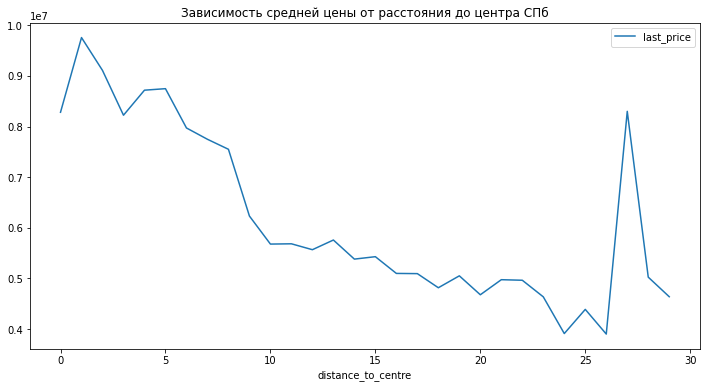

In [99]:
data_spb.plot(kind='line', title='Зависимость средней цены от расстояния до центра СПб', x='distance_to_centre', y='last_price', figsize=(12,6))
plt.show()

По графику видим, что ближе к центру города цена выше, а после постепенно снижается.

Также на расстоянии 25-30 км от центра Санкт-Петербурга наблюдается резкий скачок цен на квартиры. Это можно объяснить тем, что на таком расстоянии (судя по Яндекс Картам) находятся населенные пункты (например, Пушкин), в которых, как мы выяснили ранее, также высокие цены на один квадртаный метр (опять же, как в Пушкине).

## Напишите общий вывод

Очистив исходный датафрейм от аномальных значений и поработав с пропусками, дубликатами, мы провели исследовательский анализ данных, в ходе которого узнали о квартирах в Санкт-Петербурге и ближайших населенных пунктах следующее:

**1) Выводы о главных параметрах:**

*Общая площадь квартиры:*
- В основном, предалагаются квартиры от 40 до 68 квадратных метра.

*Жилая площадь:*
- В основном, квартиры имеют жилую площадь от 18 до 40 квадратных метра.

*Площадь кухни:*
- В основном, квартиры в выборке имеют кухни площадью от 7 до 11 квадратных метра.

*Цена объекта:*
- В основном, квартиры стоят от 3 миллионов до 6 миллионов.

*Количество комнат:*
- В основном, продаются квартиры с 1, 2 или 3 комнатами;
- Большинство квартир 2-х комнатные.

*Высота потолков:*
- В основном, в СПб и пригородах высота потолков от 2.6 метров до 2,7 метров.

*Тип этажа квартиры:*
- В основном продаются квартиры не на первом и не на последнем этажах.

*Общее количество этажей в доме:*
- В основном, дома имеют от 5 до 16 этажей;
- Дома, в которых 9 этажей, преобладают в выборке.

*Расстояние до центра города в метрах:*
- В основном, от домов до центра города от 10 км до 16,5 км.

*Расстояние до ближайшего парка в метрах:*
- В основном, до парка от жилого дома идти от 300 до 600 метров

**2) Быстрота продаж квартир:**
- Чаще всего квартиры подаются за 99 дней;
- Можно попробовать продать квартиру быстро, за 44 дня.

**3) Факторы, которые больше всего влияют на стоимость квартиры:**
- Сильнее всего корреляция между ценой квартиры и количеством комнат. Чем больше комнат, тем выше цена на квартиру;
- Не менее важный фактор - общая площадь квартиры. Чем больше общая площадь, тем дороже квартира;
- Есть и прямопропорциональная зависимость между жилой площадью квартиры и ее ценой;
- Самая слабая из всех прямопропорциональных корреляций у площади кухни и ценой квартиры; 
- Также важно знать, что квартира не на первом и не на последнем этажах стоит дороже.

**4) Факторы, не влияющие на стоимость квартиры:**
Линейной зависимости между датой (днем недели, месяцом и годом размещения объявления) и ценой как таковой нет.
Однако, есть интересеные наблюдения:
- Самую высокую цену на квартиры ставили по вторникам, а самую низкую - по пятницам;
- Самые высокие цены на квартиры, которые были выставлены на сайт в сентябре и в декабре;
- Самые низкие цены на квартиры, которые были выставлены на сайт в июне;
- Квартиры, в основном, стоили дороже всего в 2014 году;
- Дешевле всего квартиры стоили в 2016 году;
- С 2017 года постепенно виден рост цен на квартиры.

**5) Средняя цена одного квадратного метра в 10 чаще встречабщихся населенных пунктах:**
Среди 10 городов или населенных пунктов, в которых чаще всего продают квартиры:
- Самая высокая средняя цена квадратного метра в Санкт-Петербурге;
- Самая низкая - во Всеволожске.

**6) Средняя стоимость квартир в СПб в зависимости от расстояния до центра города:**

Ближе к центру города (7-8)цена выше, а после постепенно снижается.

Также на расстоянии 25-30 км от центра Санкт-Петербурга наблюдается резкий скачок цен на квартиры.